<a href="https://colab.research.google.com/github/mraaheb/DataMining/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 — Load the Preprocessed Dataset

We begin Phase 3 by loading the preprocessed dataset generated in Phase 2.  
This dataset is already cleaned and encoded, so it is ready for applying K-means clustering.


In [89]:
import pandas as pd

df = pd.read_csv("lung_cancer_preprocessed.csv")
print(df.shape)
df.head()



(50000, 11)


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,2,1,0.660248,2,0,0,1,1,0,No
1,100001,0,0,0.127785,2,0,1,1,1,1,Yes
2,100002,2,0,0.004055,1,1,1,1,0,0,Yes
3,100003,2,0,0.440640,0,0,1,0,1,0,Yes
4,100004,0,0,0.444313,1,1,0,1,0,1,Yes


## Phase 3 – Part 2: K-Means Clustering

In this part, we apply K-Means clustering to discover natural groups in the preprocessed lung cancer dataset.  
We will:

1. Prepare the feature matrix by removing non-informative columns (ID and class label).
2. Standardize all numeric attributes so that they are on a comparable scale.
3. Apply K-Means with three different values of K .
4. Evaluate and compare the clustering results using:
   - Inertia (within-cluster sum of squares / Elbow method)
   - Silhouette coefficient
5. Interpret the clusters and discuss what they reveal about patient risk profiles.


In [90]:
import pandas as pd

# 1) Prepare feature matrix for K-Means
# Drop ID and class label, we don't want them in clustering
cols_to_drop = ['patient_id', 'lung_cancer']  # adjust if your column names differ
feature_cols = [c for c in df.columns if c not in cols_to_drop]

X = df[feature_cols]

print("Feature columns used for clustering:")
print(feature_cols)

print("\nShape of X:", X.shape)
print("\nData types:")
print(X.dtypes)

print("\nFirst 5 rows of features:")
X.head()


Feature columns used for clustering:
['age', 'gender', 'pack_years', 'radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption', 'family_history']

Shape of X: (50000, 9)

Data types:
age                            int64
gender                         int64
pack_years                   float64
radon_exposure                 int64
asbestos_exposure              int64
secondhand_smoke_exposure      int64
copd_diagnosis                 int64
alcohol_consumption            int64
family_history                 int64
dtype: object

First 5 rows of features:


,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history
0,2,1,0.660248,2,0,0,1,1,0
1,0,0,0.127785,2,0,1,1,1,1
2,2,0,0.004055,1,1,1,1,0,0
3,2,0,0.440640,0,0,1,0,1,0
4,0,0,0.444313,1,1,0,1,0,1


### 2.1 Determining the Optimal Number of Clusters (K)
To perform K-Means clustering effectively, we first need to determine the optimal number of clusters ($K$).
We will test different values of $K$ (from 2 to 10) and evaluate them using two methods:
1. **Elbow Method (Inertia):** To measure the compactness of clusters.
2. **Silhouette Coefficient:** To measure how well the clusters are separated.

Running K-Means for different K values... This might take a minute.
K=2: Inertia=141270.13, Silhouette=0.1482
K=3: Inertia=124264.60, Silhouette=0.1446
K=4: Inertia=112120.75, Silhouette=0.1494
K=5: Inertia=104189.03, Silhouette=0.1416
K=6: Inertia=97983.29, Silhouette=0.1420
K=7: Inertia=93387.29, Silhouette=0.1316
K=8: Inertia=89985.17, Silhouette=0.1265
K=9: Inertia=86969.90, Silhouette=0.1256
K=10: Inertia=85130.91, Silhouette=0.1317


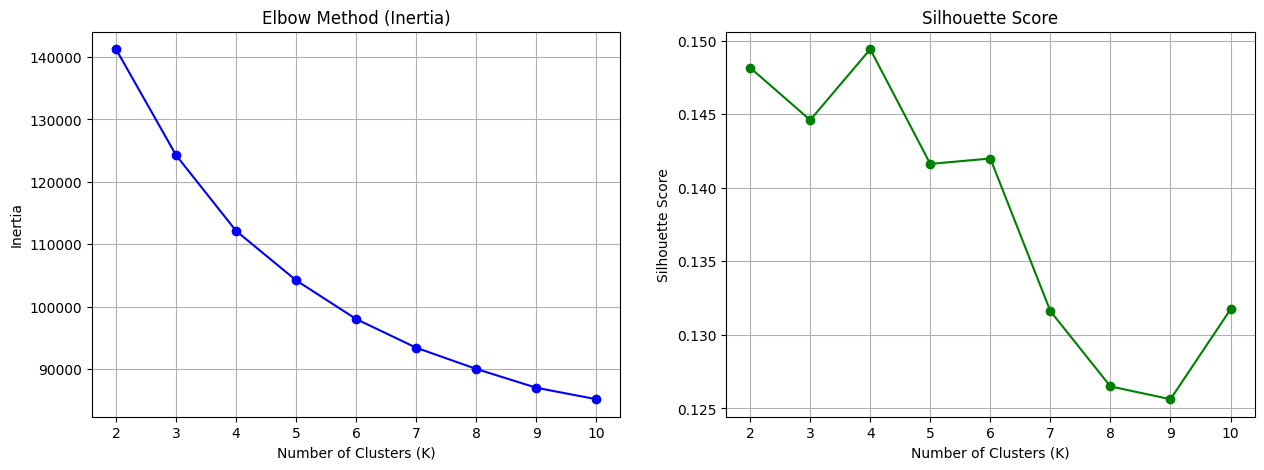

In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lists to store the results
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Testing K from 2 to 10

print("Running K-Means for different K values... This might take a minute.")

for k in K_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the model on your data X
    kmeans.fit(X)

    # Append inertia (Sum of squared distances to the closest cluster center)
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score (Quality of clusters)
    # Note: Sample size is used to speed up calculation on large datasets (50k rows)
    score = silhouette_score(X, kmeans.labels_, sample_size=5000, random_state=42)
    silhouette_scores.append(score)

    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={score:.4f}")

# --- Plotting the Results ---

fig, ax1 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Elbow Method (Inertia)
ax1[0].plot(K_range, inertia, marker='o', color='blue')
ax1[0].set_title('Elbow Method (Inertia)')
ax1[0].set_xlabel('Number of Clusters (K)')
ax1[0].set_ylabel('Inertia')
ax1[0].grid(True)

# Plot 2: Silhouette Score
ax1[1].plot(K_range, silhouette_scores, marker='o', color='green')
ax1[1].set_title('Silhouette Score')
ax1[1].set_xlabel('Number of Clusters (K)')
ax1[1].set_ylabel('Silhouette Score')
ax1[1].grid(True)

plt.show()

### Analysis and Justification of K Choices:
Based on the graphs above, we observed the following:
* **Silhouette Score:** The highest score is achieved at **K=4** (approx 0.149), which indicates the best cluster quality. **K=2** also shows a strong score (approx 0.148).
* **Elbow Method:** The inertia decreases rapidly and starts to flatten (form an elbow) around **K=4**.

**Decision:**
For this phase, we select **K = 2, 4, and 6** for the following reasons:
1.  **K=4:** This appears to be the **optimal number** of clusters (Highest Silhouette score + Elbow point).
2.  **K=2:** It has the second-best Silhouette score, representing a simple segmentation (e.g., High Risk vs. Low Risk).
3.  **K=6:** We selected a higher value to **compare** and observe how increasing clusters affects the model performance (note that the Silhouette score drops significantly after K=6).

### 2.2 K-Means Results for Selected K Values (K = 2, 4, 6)

In this step, we run K-Means using the three selected K values (2, 4, and 6) on the preprocessed feature matrix.
For each K, we report the inertia (WCSS) and the Silhouette score, and we also store the cluster labels in `X` as new columns (`cluster_k2`, `cluster_k4`, `cluster_k6`).


In [92]:
# Running K-Means for the selected K values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

selected_k = [2, 4, 6]   # the three values you chose

results = {}  # to store inertia and silhouette for each K

for k in selected_k:
    print(f"\n=== K = {k} ===")

    # Train the K-means model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)   # X = your feature matrix

    # Save cluster labels as a new column in the dataframe
    df[f'cluster_k{k}'] = labels

    # Compute evaluation metrics
    inertia_k = kmeans.inertia_
    sil_k = silhouette_score(X, labels, sample_size=5000, random_state=42)

    results[k] = {
        "inertia": inertia_k,
        "silhouette": sil_k
    }

    print(f"Inertia (WCSS): {inertia_k:.2f}")
    print(f"Silhouette score: {sil_k:.4f}")



=== K = 2 ===
Inertia (WCSS): 141270.13
Silhouette score: 0.1482

=== K = 4 ===
Inertia (WCSS): 112120.75
Silhouette score: 0.1494

=== K = 6 ===
Inertia (WCSS): 97983.29
Silhouette score: 0.1420


Section: Convert Class Label to Numeric (for Interpretation Only)

Important:
This is not used for clustering.
It is only for cluster interpretation after training (unsupervised learning remains unchanged).

In [93]:
# Convert Yes/No to numeric 1/0 for interpretation only
df['lung_cancer_bin'] = (df['lung_cancer'] == 'Yes').astype(int)

df[['lung_cancer', 'lung_cancer_bin']].head()


,lung_cancer,lung_cancer_bin
0,No,0
1,Yes,1
2,Yes,1
3,Yes,1
4,Yes,1


📌 Section: Cluster Summary and Interpretation (Risk Profiles)

In [94]:
# Summaries for each cluster
for k in selected_k:
    print(f"\n===== Cluster Summary for K = {k} =====")

    cluster_col = f'cluster_k{k}'

    summary = df.groupby(cluster_col).agg(
        count=('patient_id', 'count'),
        avg_age=('age', 'mean'),
        avg_pack_years=('pack_years', 'mean'),
        avg_radon=('radon_exposure', 'mean'),
        avg_asbestos=('asbestos_exposure', 'mean'),
        avg_secondhand_smoke=('secondhand_smoke_exposure', 'mean'),
        copd_rate=('copd_diagnosis', 'mean'),
        alcohol_avg=('alcohol_consumption', 'mean'),
        family_history_avg=('family_history', 'mean'),
        lung_cancer_rate=('lung_cancer_bin', 'mean')
    )

    print(summary.round(3))



===== Cluster Summary for K = 2 =====
            count  avg_age  avg_pack_years  avg_radon  avg_asbestos  \
cluster_k2                                                            
0           24019    0.418           0.499      0.996         0.497   
1           25981    1.808           0.501      1.002         0.497   

            avg_secondhand_smoke  copd_rate  alcohol_avg  family_history_avg  \
cluster_k2                                                                     
0                          0.506      0.501         1.21               0.504   
1                          0.497      0.501         0.81               0.496   

            lung_cancer_rate  
cluster_k2                    
0                      0.642  
1                      0.729  

===== Cluster Summary for K = 4 =====
            count  avg_age  avg_pack_years  avg_radon  avg_asbestos  \
cluster_k4                                                            
0           13358    1.874           0.499      1.

### 2.3 Visualizing the Clusters in 2D (PCA)

To better understand how the clusters are distributed in the feature space, we apply PCA to reduce the 9-dimensional feature matrix to 2 principal components, and then plot the resulting 2D scatter plots for each selected K value (2, 4, 6). Each color represents a different cluster.


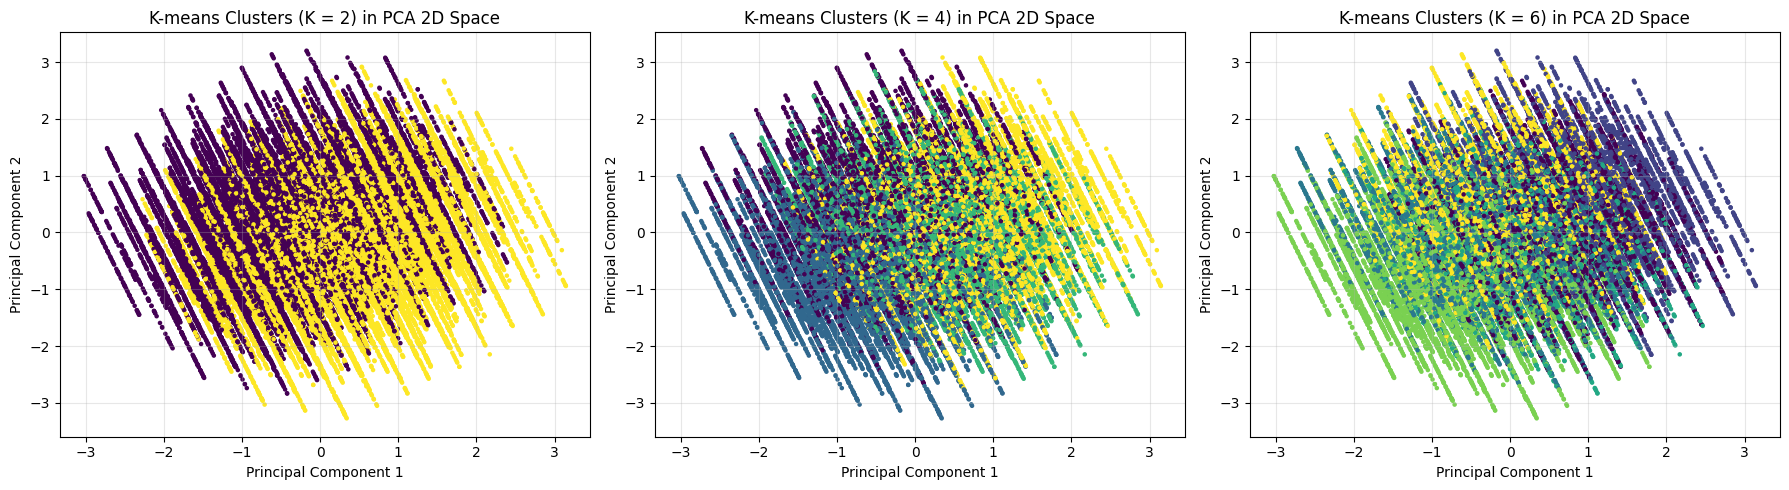

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 0) إعادة تحميل الداتا من الملف مباشرة (نظيفة)
df = pd.read_csv("lung_cancer_preprocessed.csv")

# 1) تجهيز الـ features فقط (بدون ID وبدون class label)
cols_to_drop = ['patient_id', 'lung_cancer']   # تأكدي إن اسم العمود زي اللي عندك بالضبط
feature_cols = [c for c in df.columns if c not in cols_to_drop]
X = df[feature_cols].values

# 2) Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) PCA إلى بعدين
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 4) نجرّب K-means لـ K = 2, 4, 6 ونرسم
K_values = [2, 4, 6]
plt.figure(figsize=(18, 5))

for i, k in enumerate(K_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    plt.subplot(1, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=5, cmap='viridis')
    plt.title(f"K-means Clusters (K = {k}) in PCA 2D Space", fontsize=12)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
